In [1]:
import numpy as np
from tensorflow import keras

In [3]:
## Sequential API (순서대로 하는거에 좋다)
model = keras.Sequential(name = 'Sequential')
model.add(keras.layers.Input(shape = (32, )))
model.add(keras.layers.Dense(units = 32, activation = 'relu', name = 'hidden1'))
# model.add(keras.layers.Dense(units = 32, input_shape = (32, ), activation = 'relu', name = 'hidden1'))
model.add(keras.layers.Dense(16, activation = 'relu', name = 'hidden2'))
model.add(keras.layers.Dense(1, activation = 'sigmoid', name = 'output'))

model.summary()

Model: "Sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 32)                1056      
                                                                 
 hidden2 (Dense)             (None, 16)                528       
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


In [4]:
## Functional API (모델의 자유도 면에서 더 좋다)
inputs = keras.layers.Input(shape = (32, ), name = 'Input')
hidden1 = keras.layers.Dense(32, activation = 'relu', name = 'hidden1')(inputs)
hidden2 = keras.layers.Dense(16, 'relu', name = 'hidden2')(hidden1)
outputs = keras.layers.Dense(1, 'sigmoid', name = 'output')(hidden2)

model_functional = keras.Model(inputs, outputs, name = 'Function_API')
model_functional.summary()

Model: "Function_API"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 32)]              0         
                                                                 
 hidden1 (Dense)             (None, 32)                1056      
                                                                 
 hidden2 (Dense)             (None, 16)                528       
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


In [5]:
## Subclassing (함수 콜을 할때 unit을 수정할 수 있음)
class mymodel(keras.Model):
    def __init__(self, hidden1, hidden2, outputs):
        super(mymodel, self).__init__(name = 'subclassing')
        self.dense1 = keras.layers.Dense(hidden1, 'relu', name = 'hidden1')
        self.dense2 = keras.layers.Dense(hidden2, 'relu', name = 'hidden2')
        self.outputs = keras.layers.Dense(outputs, 'sigmoid', name = 'outputs')

    def call(self, inptus):
        x = self.dense1(inptus)
        x = self.dense2(x)
        x = self.outputs(x)

        return x
    
mymodel_subclass = mymodel(32, 16, 1)

In [6]:
mymodel_subclass.build(input_shape=(1, 32, ))

In [7]:
mymodel_subclass.summary()

Model: "subclassing"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             multiple                  1056      
                                                                 
 hidden2 (Dense)             multiple                  528       
                                                                 
 outputs (Dense)             multiple                  17        
                                                                 
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


In [8]:
class mymodel(keras.Model):
    def __init__(self, hidden1, hidden2, outputs):
        super(mymodel, self).__init__(name = 'subclass')
        self.dense1 = keras.layers.Dense(hidden1, 'relu', name = 'hidden1')
        self.dense2 = keras.layers.Dense(hidden2, 'relu', name = 'hidden2')
        self.outputs = keras.layers.Dense(outputs, 'sigmoid', name = 'outputs')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.outputs(x)
        return x

In [9]:
mymodel_subclass = mymodel(32, 16, 1)

In [10]:
mymodel_subclass.build(input_shape=(1, 32, ))
mymodel_subclass.summary()

Model: "subclass"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             multiple                  1056      
                                                                 
 hidden2 (Dense)             multiple                  528       
                                                                 
 outputs (Dense)             multiple                  17        
                                                                 
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


In [11]:
### Funtional API (Conv1D)
inputs = keras.layers.Input(shape = (20, 1))
dropouts = keras.layers.Dropout(rate = 0.2)(inputs)
conv = keras.layers.Conv1D(filters = 10, kernel_size = 3, padding = 'same', activation = 'relu')(dropouts)
max_pool = keras.layers.MaxPool1D(3)(conv)
flatten = keras.layers.Flatten()(max_pool)
hidden = keras.layers.Dense(50, activation='relu')(flatten)
outputs = keras.layers.Dense(10, activation = 'softmax')(hidden)

model = keras.Model(inputs, outputs)
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 20, 1)]           0         
                                                                 
 dropout (Dropout)           (None, 20, 1)             0         
                                                                 
 conv1d (Conv1D)             (None, 20, 10)            40        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 6, 10)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 60)                0         
                                                                 
 dense (Dense)               (None, 50)                3050      
                                                             

In [2]:
class mymodel(keras.Model):
    def __init__(self, hidden1, hidden2, outputs):
        super(mymodel, self).__init__(name = 'subclassing')
        self.dense1 = keras.layers.Dense(hidden1, 'relu', name = 'hidden1')
        self.dense2 = keras.layers.Dense(hidden2, 'relu', name = 'hidden2')
        self.outputs = keras.layers.Dense(outputs, 'sigmoid', name = 'output')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.outputs(x)
        return x

In [4]:
mymodel_sub = mymodel(32, 32, 10)
mymodel_sub.build(input_shape=(1,32, ))
mymodel_sub.summary()

Model: "subclassing"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             multiple                  1056      
                                                                 
 hidden2 (Dense)             multiple                  1056      
                                                                 
 output (Dense)              multiple                  330       
                                                                 
Total params: 2,442
Trainable params: 2,442
Non-trainable params: 0
_________________________________________________________________


## 피마 인디언으로 예시 진행

In [5]:
data = np.loadtxt('./pima-indians-diabetes.csv', delimiter=',')
X = data[:, :-1]
y = data[:, -1]

In [6]:
model = mymodel(12, 8, 1)

In [21]:
model.build(input_shape=(1, 8, )) # 대상 정보 필요
model.summary()

Model: "subclassing"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             multiple                  108       
                                                                 
 hidden2 (Dense)             multiple                  104       
                                                                 
 output (Dense)              multiple                  9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [7]:
checkpoint = keras.callbacks.ModelCheckpoint(filepath='./best_model.hdf5', monitor='val_loss', save_best_only=True)
early_stop = keras.callbacks.EarlyStopping(patience=10)

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X, y, validation_split = 0.2, epochs = 100, batch_size = 50)

Epoch 1/100
13/13 [==============================] - 2s 15ms/step - loss: 14.3631 - acc: 0.3469 - val_loss: 10.7213 - val_acc: 0.3571
Epoch 2/100
 1/13 [=>............................] - ETA: 0s - loss: 9.7397 - acc: 0.3800

2023-03-09 14:23:04.026526: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


13/13 [==============================] - 0s 8ms/step - loss: 7.7635 - acc: 0.3648 - val_loss: 4.6397 - val_acc: 0.3896
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 2.7693 - acc: 0.4707 - val_loss: 1.5627 - val_acc: 0.5455
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 1.5119 - acc: 0.6287 - val_loss: 1.3718 - val_acc: 0.6558
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 1.4047 - acc: 0.6450 - val_loss: 1.0532 - val_acc: 0.5455
Epoch 6/100
13/13 [==============================] - 0s 7ms/step - loss: 1.2151 - acc: 0.6156 - val_loss: 1.0403 - val_acc: 0.5455
Epoch 7/100
13/13 [==============================] - 0s 8ms/step - loss: 1.1647 - acc: 0.5847 - val_loss: 0.9871 - val_acc: 0.5519
Epoch 8/100
13/13 [==============================] - 0s 7ms/step - loss: 1.1058 - acc: 0.6075 - val_loss: 0.9697 - val_acc: 0.5390
Epoch 9/100
13/13 [==============================] - 0s 8ms/step - loss: 1.0795 - acc: 0.6075 -

In [10]:
import matplotlib.pyplot as plt

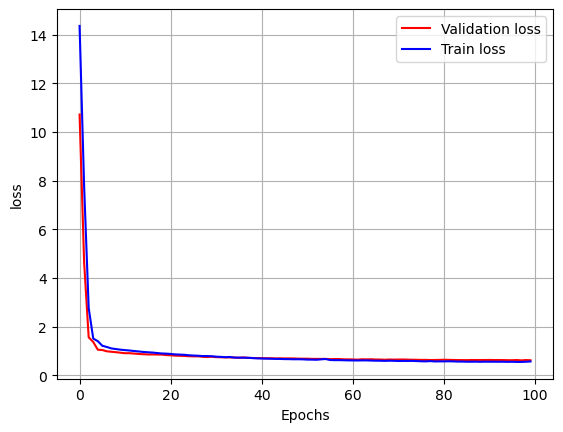

In [11]:
plt.plot(history.history['val_loss'], 'r', label = 'Validation loss')
plt.plot(history.history['loss'], 'b', label = 'Train loss')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

In [30]:
samples = ['너 오늘 이뻐 보인다',
          '나는 오늘 기분이 더러워',
          '끝내주는데, 좋은 일이 있나봐',
          '나 좋은 일이 생겼어',
          '아 오늘 진짜 짜증나',
          '환상적인데, 정말 좋은거 같아']

targets = np.array([[1], [0], [1], [1], [0], [1]])

In [17]:
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(samples)
print(tokenizer.word_index)

{'오늘': 1, '좋은': 2, '일이': 3, '너': 4, '이뻐': 5, '보인다': 6, '나는': 7, '기분이': 8, '더러워': 9, '끝내주는데': 10, '있나봐': 11, '나': 12, '생겼어': 13, '아': 14, '진짜': 15, '짜증나': 16, '환상적인데': 17, '정말': 18, '좋은거': 19, '같아': 20}


In [18]:
sequences = tokenizer.texts_to_sequences(samples)

In [20]:
input_sequence = np.array(sequences)

In [21]:
print(samples)
print(input_sequence)

['너 오늘 이뻐 보인다', '나는 오늘 기분이 더러워', '끝내주는데, 좋은 일이 있나봐', '나 좋은 일이 생겼어', '아 오늘 진짜 짜증나', '환상적인데, 정말 좋은거 같아']
[[ 4  1  5  6]
 [ 7  1  8  9]
 [10  2  3 11]
 [12  2  3 13]
 [14  1 15 16]
 [17 18 19 20]]


In [23]:
batch_size = 2
num_epochs = 100
vocab_size = len(tokenizer.word_index) + 1
emb_size = 128
hidden_dimension = 256
output_dimension = 1

In [25]:
import tensorflow as tf

In [32]:
model = keras.Sequential(name = 'Sequential_word')
model.add(keras.layers.Input(shape=4))
model.add(keras.layers.Embedding(vocab_size, emb_size))
model.add(keras.layers.Lambda(lambda x: tf.reduce_mean(x, axis = 1)))
model.add(keras.layers.Dense(hidden_dimension, 'relu', name = 'hidden1'))
model.add(keras.layers.Dense(output_dimension, 'sigmoid', name = 'output'))

In [33]:
model.summary()

Model: "Sequential_word"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 4, 128)            2688      
                                                                 
 lambda_1 (Lambda)           (None, 128)               0         
                                                                 
 hidden1 (Dense)             (None, 256)               33024     
                                                                 
 output (Dense)              (None, 1)                 257       
                                                                 
Total params: 35,969
Trainable params: 35,969
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [35]:
model.fit(input_sequence, targets, epochs=num_epochs, batch_size = batch_size)

Epoch 1/100
3/3 [==============================] - 0s 6ms/step - loss: 0.6936 - acc: 0.6667
Epoch 2/100
3/3 [==============================] - 0s 7ms/step - loss: 0.6735 - acc: 0.8333
Epoch 3/100
3/3 [==============================] - 0s 6ms/step - loss: 0.6575 - acc: 1.0000
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6402 - acc: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6208 - acc: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 7ms/step - loss: 0.5964 - acc: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 0.5696 - acc: 1.0000
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 0.5399 - acc: 1.0000
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - loss: 0.5019 - acc: 1.0000
Epoch 10/100
3/3 [==============================] - 0s 6ms/step - loss: 0.4615 - acc: 1.0000
Epoch 11/100
3/3 [==============================] - 0s 5ms/step - loss: 0.4229 

In [45]:
## Functional API
inputs = keras.layers.Input(shape=(4, ))
embed_output = keras.layers.Embedding(vocab_size, emb_size)(inputs)
pooled_output = tf.reduce_mean(embed_output, axis = 1)
hidden_layer = keras.layers.Dense(hidden_dimension, 'relu')(pooled_output)
outputs = keras.layers.Dense(output_dimension, 'sigmoid')(hidden_layer)
model = keras.Model(inputs, outputs, name = 'Functional_API')

model.summary()

Model: "Functional_API"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 4)]               0         
                                                                 
 embedding_7 (Embedding)     (None, 4, 128)            2688      
                                                                 
 tf.math.reduce_mean_2 (TFOp  (None, 128)              0         
 Lambda)                                                         
                                                                 
 dense_8 (Dense)             (None, 256)               33024     
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 35,969
Trainable params: 35,969
Non-trainable params: 0
________________________________________________

In [46]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(input_sequence, targets, epochs=num_epochs, batch_size=batch_size)

Epoch 1/100
3/3 [==============================] - 0s 6ms/step - loss: 0.6903 - acc: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6699 - acc: 1.0000
Epoch 3/100
3/3 [==============================] - 0s 8ms/step - loss: 0.6523 - acc: 1.0000
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6325 - acc: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6113 - acc: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 0.5859 - acc: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 7ms/step - loss: 0.5576 - acc: 1.0000
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 0.5234 - acc: 1.0000
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - loss: 0.4845 - acc: 1.0000
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 0.4407 - acc: 1.0000
Epoch 11/100
3/3 [==============================] - 0s 6ms/step - loss: 0.3950 

In [56]:
## Subclassing
class CustomModel(keras.Model):
    def __init__(self, vocab_size, embed_dimension, hidden_dimension, output_dimension):
        super(CustomModel, self).__init__(name = 'subclassing')
        self.embedding = keras.layers.Embedding(vocab_size, embed_dimension, name = 'embedding')
        self.dense_layer = keras.layers.Dense(hidden_dimension, 'relu', name = 'hidden')
        self.output_layer = keras.layers.Dense(output_dimension, 'sigmoid', name = 'output')

    def call(self, inputs):
        x = self.embedding(inputs)
        x = tf.reduce_mean(x, axis = 1)
        x = self.dense_layer(x)
        x = self.output_layer(x)
        return x

mycustom_model = CustomModel(vocab_size, emb_size, hidden_dimension, output_dimension)

mycustom_model.build(input_shape=(1, 4))
mycustom_model.summary()

Model: "subclassing"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       multiple                  2688      
                                                                 
 hidden (Dense)              multiple                  33024     
                                                                 
 output (Dense)              multiple                  257       
                                                                 
Total params: 35,969
Trainable params: 35,969
Non-trainable params: 0
_________________________________________________________________


In [57]:
mycustom_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
mycustom_model.fit(input_sequence, targets, epochs=num_epochs, batch_size=batch_size)

Epoch 1/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6917 - acc: 0.6667
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6720 - acc: 1.0000
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6566 - acc: 1.0000
Epoch 4/100
3/3 [==============================] - 0s 6ms/step - loss: 0.6370 - acc: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6185 - acc: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 7ms/step - loss: 0.5971 - acc: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 0.5703 - acc: 1.0000
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 0.5427 - acc: 1.0000
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 0.5097 - acc: 1.0000
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 0.4737 - acc: 1.0000
Epoch 11/100
3/3 [==============================] - 0s 6ms/step - loss: 0.4298 

In [58]:
import sklearn
sklearn.__version__

'1.2.1'

In [60]:
import pandas as pd
from sklearn.datasets import load_iris

In [62]:
iris_dataset = load_iris()
print(iris_dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [66]:
print(iris_dataset['target'])
print(iris_dataset['target_names'])
print(iris_dataset['feature_names'])
print(iris_dataset['DESCR'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ======

In [67]:
iris_dataset['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [69]:
iris = pd.DataFrame(iris_dataset['data'])
iris.columns = iris_dataset['feature_names']
iris['target'] = iris_dataset['target']
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [72]:
setosa = iris[iris['target'] == 0]
versicolour = iris[iris['target'] == 1]
virginica = iris[iris['target'] == 2]

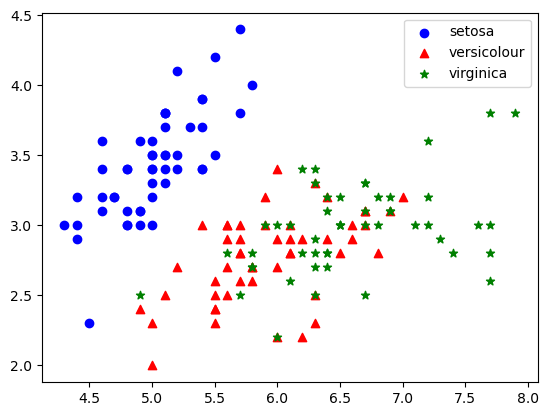

In [79]:
plt.scatter(setosa['sepal length (cm)'], setosa['sepal width (cm)'], marker='o', c='b', label='setosa')
plt.scatter(versicolour['sepal length (cm)'], versicolour['sepal width (cm)'], marker='^', c='r', label='versicolour')
plt.scatter(virginica['sepal length (cm)'], virginica['sepal width (cm)'], marker='*', c='g', label='virginica')
plt.legend()
plt.show()

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [81]:
train_input, test_input, train_target, test_target = train_test_split(iris_dataset['data'], iris_dataset['target'], test_size=0.2, random_state=42)

In [83]:
print(train_input.shape, test_input.shape)
print()

(120, 4) (30, 4)



In [86]:
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [89]:
print(train_input[:10, :10])
print(train_scaled[:10, :10])

[[4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]
 [6.3 2.5 5.  1.9]
 [6.4 3.2 4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.2 4.1 1.5 0.1]]
[[-1.47393679  1.20365799 -1.56253475 -1.31260282]
 [-0.13307079  2.99237573 -1.27600637 -1.04563275]
 [ 1.08589829  0.08570939  0.38585821  0.28921757]
 [-1.23014297  0.75647855 -1.2187007  -1.31260282]
 [-1.7177306   0.30929911 -1.39061772 -1.31260282]
 [ 0.59831066 -1.25582892  0.72969227  0.95664273]
 [ 0.72020757  0.30929911  0.44316389  0.4227026 ]
 [-0.74255534  0.98006827 -1.27600637 -1.31260282]
 [-0.98634915  1.20365799 -1.33331205 -1.31260282]
 [-0.74255534  2.32160658 -1.27600637 -1.44608785]]


#### K-최근접 이웃

In [90]:
from sklearn.neighbors import KNeighborsClassifier

In [91]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [102]:
new_input = np.array([[6.1, 2.3, 1.5, 6.2]])
new_scaled = ss.transform(new_input)
predict = knn.predict(new_scaled)
print(predict)

knn.predict_proba(new_scaled)

[2]


array([[0., 0., 1.]])

In [105]:
predict_test = knn.predict(test_scaled)
print(predict_test)

np.mean(predict_test == test_target)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


1.0

#### K-평균 군집화(K-means)

In [106]:
from sklearn.cluster import KMeans

In [109]:
k_means = KMeans(n_clusters=3)
k_means.fit(train_input)

/home/jasper/anaconda3/envs/nlp/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [112]:
new_input = np.array([[6.1, 2.3, 1.5, 6.2]])
new_scaled = ss.transform(new_input)
predict = k_means.predict(new_scaled)

predict_cluster = k_means.predict(test_input)
print(predict_cluster)

[2 0 1 2 2 0 2 1 2 2 1 0 0 0 0 2 1 2 2 1 0 2 0 1 1 1 1 1 0 0]


In [126]:
np_arr = np.array(predict_cluster)
np_arr[np_arr==0], np_arr[np_arr==1], np_arr[np_arr==2] = 3, 4, 5
np_arr[np_arr==3] = 1
np_arr[np_arr==4] = 2
np_arr[np_arr==5] = 0
predict_label = np_arr.tolist()
print(predict_label)

[0, 1, 2, 0, 0, 1, 0, 2, 0, 0, 2, 1, 1, 1, 1, 0, 2, 0, 0, 2, 1, 0, 1, 2, 2, 2, 2, 2, 1, 1]


In [127]:
np.mean(predict_label==test_target)

0.3333333333333333